In [3]:
import pandas as pd
import numpy as np


In [4]:
df_reviews=pd.read_csv(r'C:\Users\Abhishek\OneDrive\Desktop\DS_projects\Datasets\reviews.csv')

In [5]:
df_listing=pd.read_csv(r'C:\Users\Abhishek\OneDrive\Desktop\DS_projects\Datasets\listings.csv')

In [4]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [24]:
new_df=df_listing[['host_is_superhost','host_neighbourhood','price']].copy()

In [25]:
new_df

,host_is_superhost,host_neighbourhood,price
0,f,NaN,$70.00
1,t,Center Square & Hudson/Park,$100.00
2,t,NaN,$75.00
3,t,Center Square & Hudson/Park,$95.00
4,t,NaN,$86.00
...,...,...,...
442,f,Park South,$120.00
443,t,Mansion Area,$150.00
444,t,Ten Broeck Triangle,$107.00
445,f,NaN,$57.00


In [26]:
new_df.isnull().sum().astype(int)

host_is_superhost     12
host_neighbourhood    71
price                 32
dtype: int64

In [27]:
new_df['host_is_superhost']=new_df['host_is_superhost'].fillna(new_df['host_is_superhost'].mode()[0])

In [28]:
new_df['host_neighbourhood'] = new_df['host_neighbourhood'].fillna("unknown")

In [29]:
new_df = new_df.dropna(subset=['price'])

In [30]:
new_df.loc[:,'price'] = new_df['price'].replace('[$,]', '', regex=True)

In [31]:
new_df.loc[:,'price'] = pd.to_numeric(new_df['price'])

In [32]:
new_df.dtypes

host_is_superhost     object
host_neighbourhood    object
price                 object
dtype: object

In [36]:
new_df=new_df.groupby(['host_neighbourhood','host_is_superhost'])['price'].median().rest_index

KeyError: 'Column not found: price'

In [39]:
new_df=new_df.unstack()

In [40]:
new_df.reset_index()

host_is_superhost,host_neighbourhood,f,t
0,Arbor Hill,85.0,78.0
1,Beverwyck,NaN,116.0
2,Buckingham Lake,122.5,163.0
3,Capitol Hill,85.0,101.0
4,Center Square & Hudson/Park,93.0,109.0
5,Central Avenue,120.0,105.0
6,Delaware Avenue,133.0,132.0
7,Downtown,80.5,112.5
8,East Riverside - Oltorf,NaN,102.0
9,Geyser Crest,NaN,88.0


In [43]:
new_df = new_df.reset_index()

In [44]:
new_df['diff']=abs(new_df['f']-new_df['t'])

In [45]:
new_df

host_is_superhost,host_neighbourhood,f,t,diff
0,Arbor Hill,85.0,78.0,7.0
1,Beverwyck,NaN,116.0,NaN
2,Buckingham Lake,122.5,163.0,40.5
3,Capitol Hill,85.0,101.0,16.0
4,Center Square & Hudson/Park,93.0,109.0,16.0
5,Central Avenue,120.0,105.0,15.0
6,Delaware Avenue,133.0,132.0,1.0
7,Downtown,80.5,112.5,32.0
8,East Riverside - Oltorf,NaN,102.0,NaN
9,Geyser Crest,NaN,88.0,NaN


In [46]:
new_df = new_df.dropna(subset=['f', 't','diff'])


In [47]:
new_df

host_is_superhost,host_neighbourhood,f,t,diff
0,Arbor Hill,85.0,78.0,7.0
2,Buckingham Lake,122.5,163.0,40.5
3,Capitol Hill,85.0,101.0,16.0
4,Center Square & Hudson/Park,93.0,109.0,16.0
5,Central Avenue,120.0,105.0,15.0
6,Delaware Avenue,133.0,132.0,1.0
7,Downtown,80.5,112.5,32.0
12,Manning Boulevard,134.0,81.0,53.0
13,Mansion Area,107.0,113.5,6.5
15,Melrose,120.0,69.5,50.5


In [49]:
max_r=max_diff=new_df['diff'].max()

In [51]:
result=new_df[new_df['diff']==max_r]

In [54]:
result=result.reset_index()

In [56]:
neigh_hodd=result['host_neighbourhood']

In [62]:
neigh_hodd.reset_index()

,index,host_neighbourhood
0,0,Pastures


In [113]:
df1=df_listing[['id','price','host_neighbourhood']].copy()

In [114]:
df1.head()

,id,price,host_neighbourhood
0,2992450,$70.00,NaN
1,3820211,$100.00,Center Square & Hudson/Park
2,5651579,$75.00,NaN
3,6623339,$95.00,Center Square & Hudson/Park
4,9005989,$86.00,NaN


In [115]:
# Return only the top 1% most expensive listings per neighbourhood.

In [116]:
df1['price']=df1['price'].replace('[$,]','',regex=True)

In [117]:
df1.dtypes

id                     int64
price                 object
host_neighbourhood    object
dtype: object

In [118]:
df1['price'] = pd.to_numeric(df1['price'])


In [119]:
df1

,id,price,host_neighbourhood
0,2992450,70.0,NaN
1,3820211,100.0,Center Square & Hudson/Park
2,5651579,75.0,NaN
3,6623339,95.0,Center Square & Hudson/Park
4,9005989,86.0,NaN
...,...,...,...
442,1419803505997334256,120.0,Park South
443,1430417055174000914,150.0,Mansion Area
444,1432823196473666155,107.0,Ten Broeck Triangle
445,1434108183586713709,57.0,NaN


In [120]:
df1['host_neighbourhood'] = df1['host_neighbourhood'].fillna('unknown')

In [121]:
df1

,id,price,host_neighbourhood
0,2992450,70.0,unknown
1,3820211,100.0,Center Square & Hudson/Park
2,5651579,75.0,unknown
3,6623339,95.0,Center Square & Hudson/Park
4,9005989,86.0,unknown
...,...,...,...
442,1419803505997334256,120.0,Park South
443,1430417055174000914,150.0,Mansion Area
444,1432823196473666155,107.0,Ten Broeck Triangle
445,1434108183586713709,57.0,unknown


In [122]:
df1.isnull().sum().astype(int)

id                     0
price                 32
host_neighbourhood     0
dtype: int64

In [123]:
df1=df1.groupby('host_neighbourhood')['price'].max().reset_index().sort_values(by='price',ascending=False)

In [124]:
df1

,host_neighbourhood,price
16,Melrose,1486.0
25,Pastures,1050.0
24,Park South,821.0
26,Pine Hills,582.0
7,Delaware Avenue,476.0
14,Mansion Area,342.0
40,unknown,320.0
35,Washington Park,313.0
12,Highland Lakes,280.0
5,Center Square & Hudson/Park,270.0


In [125]:
# Return only the top 1% most expensive listings per neighbourhood.
df1.isnull().sum()

host_neighbourhood    0
price                 1
dtype: int64

In [111]:
df1['price'] = df1['price']

In [112]:
df1

,host_neighbourhood,price
16,Melrose,1.486
25,Pastures,1.050
24,Park South,0.821
26,Pine Hills,0.582
7,Delaware Avenue,0.476
14,Mansion Area,0.342
40,unknown,0.320
35,Washington Park,0.313
12,Highland Lakes,0.280
5,Center Square & Hudson/Park,0.270


In [127]:
df1[df1['price'] >= df1['price'].quantile(0.99)]

,host_neighbourhood,price
16,Melrose,1486.0


In [129]:
df_reviews.head()

,listing_id,date
0,2992450,2014-07-01
1,2992450,2014-10-24
2,2992450,2015-03-04
3,2992450,2015-03-25
4,2992450,2015-06-23


In [145]:
df_reviews.dtypes

listing_id             int64
date          datetime64[ns]
month                  int32
year                   int32
dtype: object

In [144]:
df_reviews['date']=pd.to_datetime(df_reviews['date'])
df_reviews['month']= df_reviews['date'].dt.month
df_reviews['year']= df_reviews['date'].dt.year
#Find the month (across all years) that has the highest number of reviews on average.



In [146]:
monthly_counts = df_reviews.groupby(['year', 'month']).size().reset_index(name='review_count')

In [147]:
monthly_counts

,year,month,review_count
0,2014,7,1
1,2014,8,4
2,2014,9,5
3,2014,10,8
4,2014,11,8
...,...,...,...
126,2025,2,514
127,2025,3,496
128,2025,4,428
129,2025,5,621


In [148]:
avg_per_month = monthly_counts.groupby('month')['review_count'].mean().reset_index().sort_values(b)


In [149]:
avg_per_month

,month,review_count
0,1,155.000000
1,2,206.400000
2,3,196.272727
3,4,195.727273
4,5,243.181818
5,6,184.818182
6,7,214.636364
7,8,229.818182
8,9,199.000000
9,10,240.636364


In [151]:
avg_per_month = avg_per_month.sort_values(by='review_count', ascending=False)

In [152]:
avg_per_month

,month,review_count
4,5,243.181818
9,10,240.636364
7,8,229.818182
6,7,214.636364
1,2,206.400000
8,9,199.000000
2,3,196.272727
3,4,195.727273
5,6,184.818182
10,11,161.363636


In [175]:
threshhol = avg_per_month['review_count'].quantile(0.10)

In [176]:
threshhol

np.float64(243.1818181818182)

In [173]:
avg_per_month=avg_per_month[avg_per_month['review_count']>=threshhol]

In [174]:
avg_per_month

,month,review_count
4,5,243.181818


In [177]:
# Task 3 – Superhost Advantage in Top Reviewed Neighbourhoodspri
#🔍 Among the top 5 neighbourhoods (by total review count), compare the average price between superhosts and non-superhosts.

In [183]:
print(df_listing.columns)
print(df_reviews.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [185]:
df_merged=pd.merge(df_listing[['id', 'price', 'host_neighbourhood', 'host_is_superhost']], df_reviews, left_on='id',right_on='listing_id', how='inner')

In [195]:
df_merged['price'] = df_merged['price'].replace(r'[\$,]', '', regex=True)


In [198]:
df_merged['host_neighbourhood']=df_merged['host_neighbourhood'].fillna('Unkown')

In [205]:
df_merged['price']=pd.to_numeric(df_merged['price'])

In [207]:
df_merged['host_is_superhost'] = df_merged['host_is_superhost'].fillna(df_merged['host_is_superhost'].mode()[0])
df_merged['price'] = df_merged['price'].fillna(df_merged['price'].median())


In [211]:
# Task 3 – Superhost Advantage in Top Reviewed Neighbourhoodspri
#🔍 Among the top 5 neighbourhoods (by total review count), compare the average price between superhosts and non-superhosts.

In [223]:
gropued_data1=df_merged.groupby(['host_neighbourhood','host_is_superhost'])['listing_id'].size().reset_index(name='average_review_Count')

In [225]:
top_5=gropued_data1.sort_values('average_review_Count', ascending=False).head(5)


In [226]:
top_5

,host_neighbourhood,host_is_superhost,average_review_Count
50,Unkown,t,6390
40,Pine Hills,t,3530
38,Pastures,t,2567
9,Center Square & Hudson/Park,t,1962
13,Delaware Avenue,t,1826


In [236]:
top_5_neighs = top_5['host_neighbourhood'].unique()

In [237]:
top_5_neighs

array(['Unkown', 'Pine Hills', 'Pastures', 'Center Square & Hudson/Park',
       'Delaware Avenue'], dtype=object)

In [238]:
top_5df = df_merged[df_merged['host_neighbourhood'].isin(top_5_neighs)]


In [239]:
top_5df

,id,price,host_neighbourhood,host_is_superhost,listing_id,date
0,2992450,70.0,Unkown,f,2992450,2014-07-01
1,2992450,70.0,Unkown,f,2992450,2014-10-24
2,2992450,70.0,Unkown,f,2992450,2015-03-04
3,2992450,70.0,Unkown,f,2992450,2015-03-25
4,2992450,70.0,Unkown,f,2992450,2015-06-23
...,...,...,...,...,...,...
25980,1393634936904017469,48.0,Pine Hills,f,1393634936904017469,2025-05-09
25981,1393638070589049592,47.0,Unkown,f,1393638070589049592,2025-05-04
25982,1393638070589049592,47.0,Unkown,f,1393638070589049592,2025-05-07
25983,1393638070589049592,47.0,Unkown,f,1393638070589049592,2025-06-05


In [249]:
result=top_5df.groupby(['host_neighbourhood', 'host_is_superhost'])['price'].mean().reset_index(name='avg_price')


In [250]:
result

,host_neighbourhood,host_is_superhost,avg_price
0,Center Square & Hudson/Park,f,93.982456
1,Center Square & Hudson/Park,t,101.037717
2,Delaware Avenue,f,148.883333
3,Delaware Avenue,t,139.468784
4,Pastures,f,357.388889
5,Pastures,t,81.736658
6,Pine Hills,f,92.753927
7,Pine Hills,t,134.871105
8,Unkown,f,102.150608
9,Unkown,t,80.792488


In [252]:
result = result.set_index(['host_neighbourhood', 'host_is_superhost'])

In [253]:
result

avg_price
host_neighbourhood          host_is_superhost            
Center Square & Hudson/Park f                   93.982456
                            t                  101.037717
Delaware Avenue             f                  148.883333
                            t                  139.468784
Pastures                    f                  357.388889
                            t                   81.736658
Pine Hills                  f                   92.753927
                            t                  134.871105
Unkown                      f                  102.150608
                            t                   80.792488

In [254]:
result = result.unstack()

In [255]:
result

avg_price            
host_is_superhost                     f           t
host_neighbourhood                                 
Center Square & Hudson/Park   93.982456  101.037717
Delaware Avenue              148.883333  139.468784
Pastures                     357.388889   81.736658
Pine Hills                    92.753927  134.871105
Unkown                       102.150608   80.792488

In [256]:
result.columns = ['non_superhost_price', 'superhost_price']

In [257]:
result = result.reset_index()


In [258]:
result

,host_neighbourhood,non_superhost_price,superhost_price
0,Center Square & Hudson/Park,93.982456,101.037717
1,Delaware Avenue,148.883333,139.468784
2,Pastures,357.388889,81.736658
3,Pine Hills,92.753927,134.871105
4,Unkown,102.150608,80.792488


In [259]:
#Compute the correlation between review_scores_rating and price for listings that have at least 10 reviews.

In [6]:
grouped_review=df_reviews.groupby('listing_id').size().reset_index(name='review_count')

In [7]:
grouped_review

,listing_id,review_count
0,2992450,9
1,3820211,308
2,5651579,371
3,6623339,331
4,9005989,620
...,...,...
375,1393634936904017469,2
376,1393638070589049592,3
377,1414503206938039174,1
378,1415956224087762543,5


In [8]:
grouped_review=grouped_review[grouped_review['review_count']>10]

In [9]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [22]:
df_list=df_listing[['id','price','review_scores_rating']]

In [23]:
df_list.isnull().sum()

id                       0
price                   32
review_scores_rating    67
dtype: int64

In [24]:
df_list.loc[:,'price'] = df_list['price'].replace(r'[\$,]','',regex=True)

In [25]:
df_list.loc[:,'price']=pd.to_numeric(df_list['price'])

In [26]:
df_list.dtypes

id                        int64
price                    object
review_scores_rating    float64
dtype: object

In [27]:
df_rating_merged=pd.merge(df_list,grouped_review,left_on='id',right_on='listing_id',how='inner')

In [28]:
df_rating_merged

,id,price,review_scores_rating,listing_id,review_count
0,3820211,100.0,4.75,3820211,308
1,5651579,75.0,4.51,5651579,371
2,6623339,95.0,4.73,6623339,331
3,9005989,86.0,4.80,9005989,620
4,9501054,52.0,4.56,9501054,418
...,...,...,...,...,...
254,1328247359330291677,170.0,4.92,1328247359330291677,12
255,1350872245042831459,149.0,4.95,1350872245042831459,20
256,1365428503448527322,91.0,4.65,1365428503448527322,26
257,1366933239765507591,258.0,5.00,1366933239765507591,14


In [29]:
df_rating_merged = df_rating_merged.drop(columns='id')

In [30]:
df_rating_merged

,price,review_scores_rating,listing_id,review_count
0,100.0,4.75,3820211,308
1,75.0,4.51,5651579,371
2,95.0,4.73,6623339,331
3,86.0,4.80,9005989,620
4,52.0,4.56,9501054,418
...,...,...,...,...
254,170.0,4.92,1328247359330291677,12
255,149.0,4.95,1350872245042831459,20
256,91.0,4.65,1365428503448527322,26
257,258.0,5.00,1366933239765507591,14


In [331]:
df_rating_merged['price'].corr(df_rating_merged['review_scores_rating'])


np.float64(0.09065763289105988)

In [31]:
df_rating_merged['price'].corr(df_rating_merged['review_count'])


np.float64(-0.10260310770618894)

In [32]:
df_rating_merged['price']=df_rating_merged['price'].fillna(df_rating_merged['price'].mean())

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_1504\200417696.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rating_merged['price']=df_rating_merged['price'].fillna(df_rating_merged['price'].mean())


In [33]:
from sklearn.linear_model import LinearRegression

X = df_rating_merged[['review_scores_rating', 'review_count']]
y = df_rating_merged['price']
model = LinearRegression().fit(X, y)


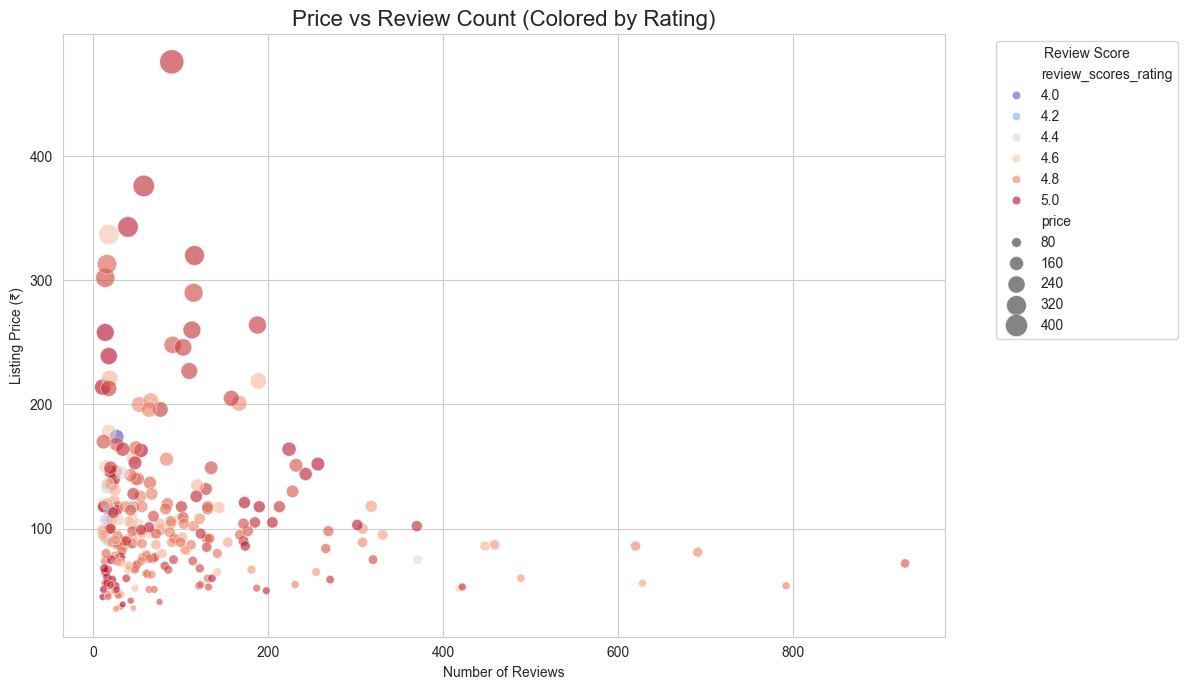

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out price outliers
df_filtered = df_rating_merged[df_rating_merged['price'] < 500].copy()

# Optional: convert to numeric (in case price was a string)
df_filtered['price'] = pd.to_numeric(df_filtered['price'], errors='coerce')
df_filtered['review_scores_rating'] = pd.to_numeric(df_filtered['review_scores_rating'], errors='coerce')
df_filtered['review_count'] = pd.to_numeric(df_filtered['review_count'], errors='coerce')

# Step 2: Set clean style
sns.set_style("whitegrid")

# Step 3: Create scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='review_count',
    y='price',
    hue='review_scores_rating',        # Color by rating
    palette='coolwarm',                # Red = high, Blue = low
    size='price',                      # Dot size reflects price
    sizes=(20, 300),                   # Min and max dot size
    alpha=0.6                          # Transparency for overlap
)

# Step 4: Add labels and title
plt.title("Price vs Review Count (Colored by Rating)", fontsize=16)
plt.xlabel("Number of Reviews")
plt.ylabel("Listing Price (₹)")
plt.legend(title='Review Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


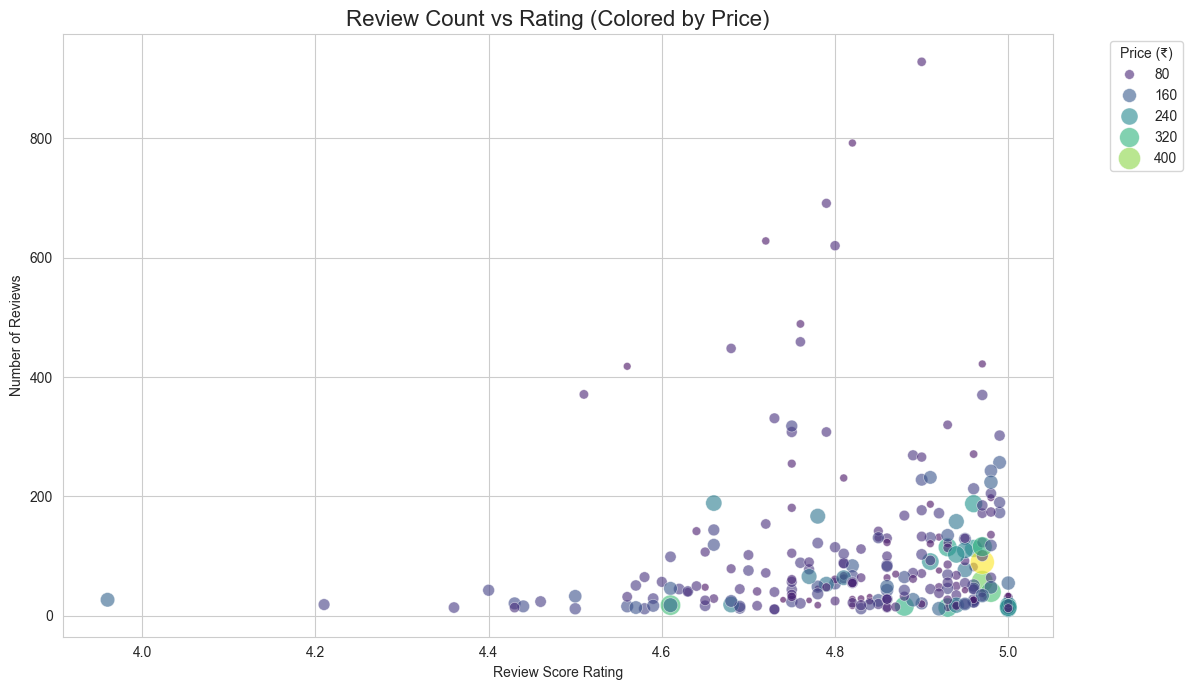

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out price outliers
df_filtered = df_rating_merged[df_rating_merged['price'] < 500].copy()

# Step 2: Ensure all columns are numeric
df_filtered['price'] = pd.to_numeric(df_filtered['price'], errors='coerce')
df_filtered['review_scores_rating'] = pd.to_numeric(df_filtered['review_scores_rating'], errors='coerce')
df_filtered['review_count'] = pd.to_numeric(df_filtered['review_count'], errors='coerce')

# Step 3: Set plot style
sns.set_style("whitegrid")

# Step 4: Create the scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='review_scores_rating',
    y='review_count',
    hue='price',                    # Color by price
    palette='viridis',              # Color map for price
    size='price',                   # Dot size based on price
    sizes=(20, 300),
    alpha=0.6
)

# Step 5: Labels and layout
plt.title("Review Count vs Rating (Colored by Price)", fontsize=16)
plt.xlabel("Review Score Rating")
plt.ylabel("Number of Reviews")
plt.legend(title='Price (₹)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


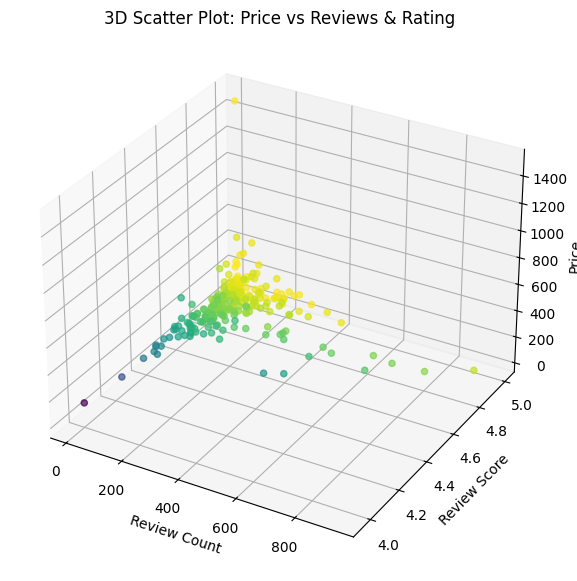

In [36]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(
    df_rating_merged['review_count'],
    df_rating_merged['review_scores_rating'],
    df_rating_merged['price'],
    c=df_rating_merged['review_scores_rating'],  # Optional: color by rating
    cmap='viridis',                # Try 'coolwarm', 'plasma', etc.
    alpha=0.7                      # Slight transparency
)

# Axis labels
ax.set_xlabel('Review Count')
ax.set_ylabel('Review Score')
ax.set_zlabel('Price')

plt.title("3D Scatter Plot: Price vs Reviews & Rating")
plt.show()


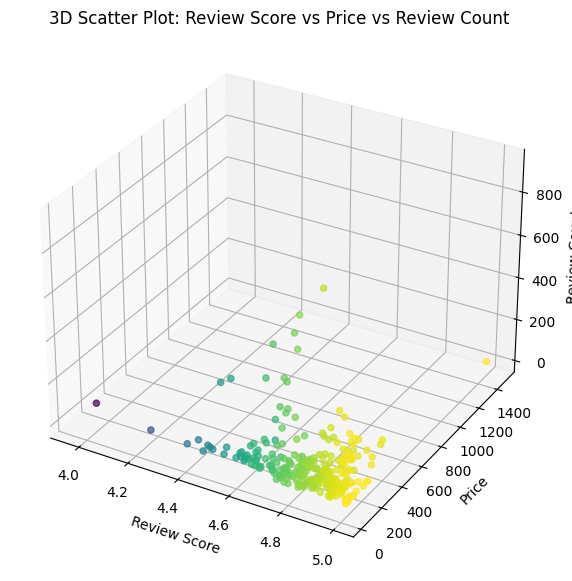

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot: rating (x), price (y), review count (z)
ax.scatter(
    df_rating_merged['review_scores_rating'],  # X
    df_rating_merged['price'],                 # Y
    df_rating_merged['review_count'],          # Z
    c=df_rating_merged['review_scores_rating'],  # Color by rating
    cmap='viridis',
    alpha=0.7
)

# Axis labels
ax.set_xlabel('Review Score')
ax.set_ylabel('Price')
ax.set_zlabel('Review Count')

plt.title("3D Scatter Plot: Review Score vs Price vs Review Count")
plt.show()
